<div align='center'><picture><source srcset="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg" type="image/webp"><img src="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg" width="300" height="300"></picture></div>

# **Article 128 : Plotting with Seaborn (Part 2)** [![Static Badge](https://img.shields.io/badge/Open%20in%20Colab%20-%20orange?style=plastic&logo=googlecolab&labelColor=grey)](https://colab.research.google.com/github/sshrizvi/DataScienceMastery/blob/main/DataVisualization/Notebooks/128_plotting_with_seaborn_part_2.ipynb)

|🔴 **NOTE** 🔴|
|:-----------:|
| This notebook contains the practical implementations of the concepts discussed in the following article.|
| Here is Article 128 - [Plotting with Seaborn (Part 2)](../Articles/128_plotting_with_seaborn_part_2.md) |

### 📦 **Importing Relevant Libraries**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### ⚠️ **Data Warning**  
For the visualizations ahead, we will be using following datasets.

In [2]:
tips_df = sns.load_dataset('tips')

In [3]:
iris_df = sns.load_dataset('iris')

## **Categorical Plots**

### 🎯 **Strip Plot**

**DEFINITION**  
A Strip Plot is a categorical scatter plot that displays individual data points along a categorical axis, allowing you to see the distribution, spread, and clustering of observations within each category.  

**Actual Idea Behind Strip Plots**  
The core idea of a strip plot is:

$$ \text{Show every single observation, but organize them by category.} $$

Instead of summarizing data (mean, median, quartiles), a strip plot:
- Plots raw data points
- Groups them by categorical variable
- Adds small adjustments to prevent overlap

This preserves data granularity while enabling category-wise comparison.

**What Actually Happens in a Strip Plot**  
1. One axis is categorical (e.g., class, gender, department)
2. The other axis is numerical
3. Each observation is plotted as a point
4. Points are optionally jittered to avoid overlap
5. Clusters of points indicate high density

$$ \text{No aggregation, no estimation — just organized raw data} $$

**DEMONSTRATION**  
To demonstrate a *Strip Plot*, we will be using the columns of `tips_df`:  
1. *Numerical Column* `total_bill`
2. *Categorical Column* `day`

**AXES LEVEL FUNCTION**

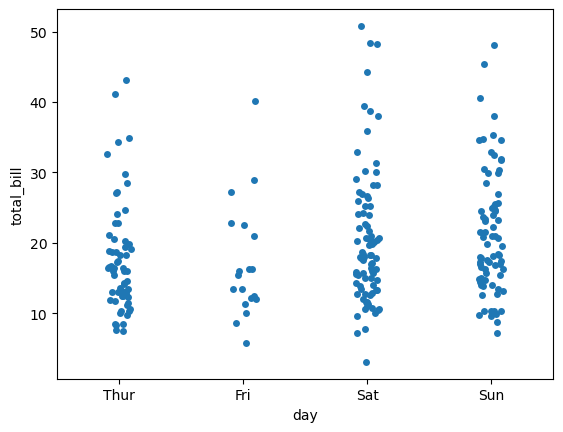

In [16]:
sns.stripplot(data=tips_df, x='day', y='total_bill')
plt.show()

**FIGURE LEVEL FUNCTION**

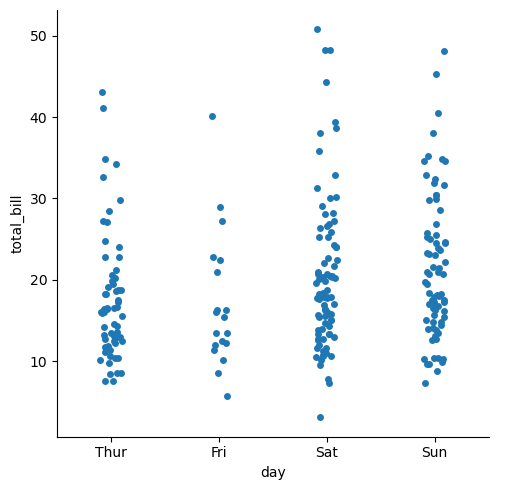

In [9]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='strip')
plt.show()

Likewise other plots of Seaborn Library, the `hue` parameter can be used here too, to add another level of information.

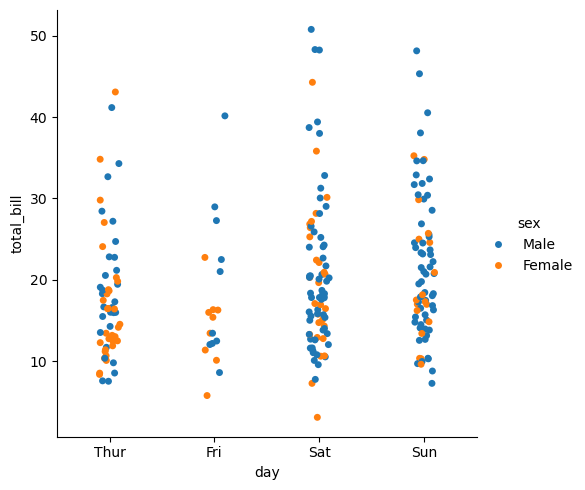

In [17]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='strip',
            hue='sex')
plt.show()

Another useful parameter of `stripplot` is `jitter` (default `True`), that is used to add a little bit of spread in the data. This is useful if your data has a large no. of observations that might overlap. For the practical understanding, lets play with the `jitter` parameter to understand its importance. 

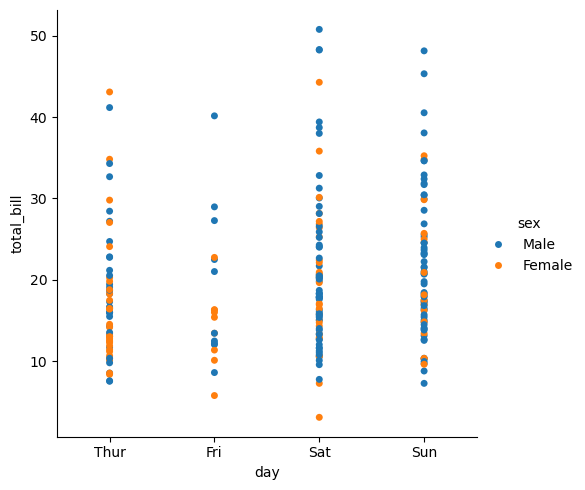

In [22]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='strip',
            hue='sex', jitter=False) # Equivalent to jitter=0
plt.show()

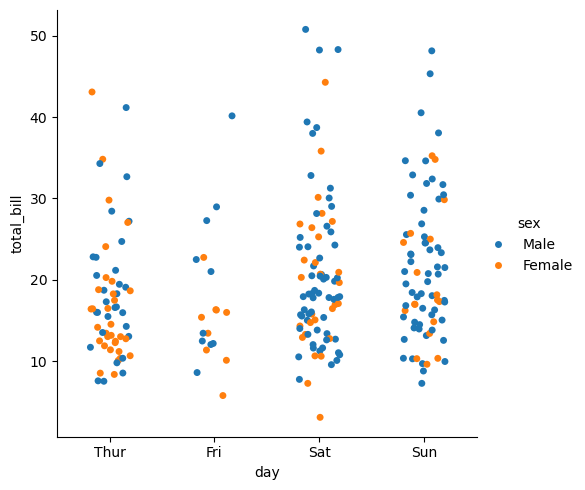

In [28]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='strip',
            hue='sex', jitter=0.2)
plt.show()

### 🎯 **Swarm Plot**

**DEFINITION**  
A Swarm Plot is a categorical scatter plot that displays individual data points along a categorical axis while automatically adjusting their positions so that no points overlap.  

**Actual Idea Behind Swarm Plots**  
The core idea of a swarm plot is:

$$ \text{Show every data point clearly without overlap, while preserving the distribution shape.} $$

Unlike strip plots (which may overlap or use random jitter), swarm plots:
1. Use a deterministic layout algorithm
2. Push points sideways just enough to avoid collisions
3. Maintain a structure that reflects local density
4. This makes swarm plots a more faithful visual representation of the data distribution.  

**What Actually Happens in a Swarm Plot**  
1. Data is grouped by a categorical variable
2. Each observation is placed along the numeric axis
3. Points are systematically shifted along the categorical axis
4. No two points overlap
5. Dense regions form wider “swarms”  
$$ \text{The width of the swarm visually encodes density} $$

**AXES LEVEL FUNCTION**

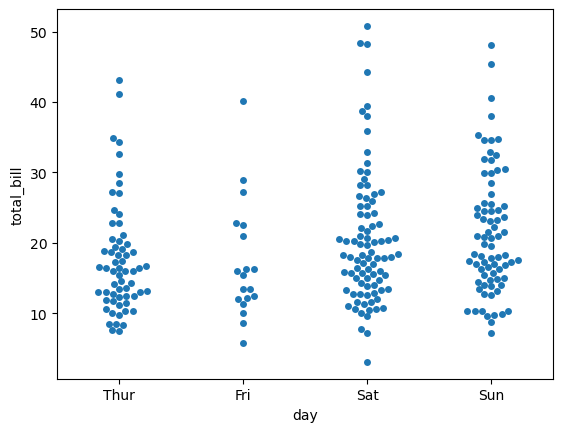

In [29]:
sns.swarmplot(data=tips_df, x='day', y='total_bill')
plt.show()

**FIGURE LEVEL FUNCTION**

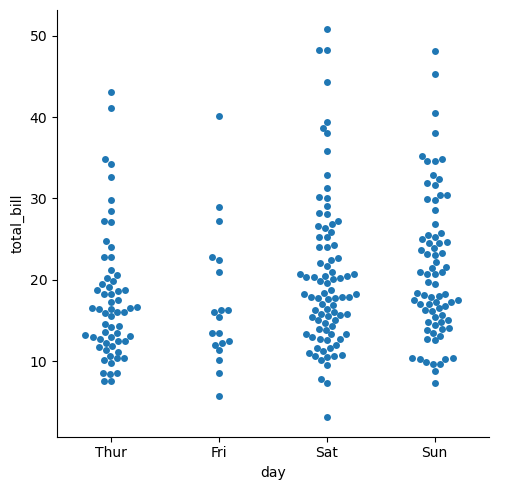

In [30]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='swarm')
plt.show()

Likewise other plots of Seaborn Library, the `hue` parameter can be used here too, to add another level of information.

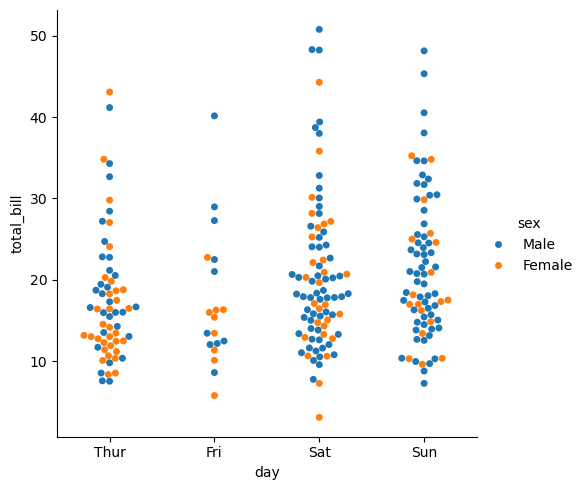

In [31]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='swarm',
            hue='sex')
plt.show()

### 🎯 **Box Plot**

**DEFINITION**  
A Box Plot (or Box-and-Whisker Plot) is a statistical summary plot that represents the distribution of numerical data using five key statistics: *minimum*, *Q1*, *median*, *Q3*, and *maximum*, along with *outliers*.  

**Actual Idea Behind Box Plots**  
The core idea of a box plot is:

$$ \text{Summarize a distribution compactly while preserving information about spread, central tendency, and outliers.} $$

Unlike strip or swarm plots (which show every data point), box plots:
- Compress the data into robust statistics
- Emphasize distribution shape and variability
- Enable easy comparison across categories

**What Actually Happens in a Box Plot**  
1. The data is sorted
2. Quartiles are computed:
    - Q1 (25%)
    - Median (50%)
    - Q3 (75%)
3. The box spans from Q1 to Q3 → IQR (Interquartile Range)
4. Whiskers extend to the most extreme non-outlier points
(typically within 1.5 × IQR)
5. Points beyond whiskers are marked as outliers

$$ \text{So, a box plot is a statistical compression of raw data}  $$

Below is the demonstration of a Box Plot to study the distribution of a single variable `total_bill`, irrespective of the categories.

**AXES LEVEL FUNCTION**

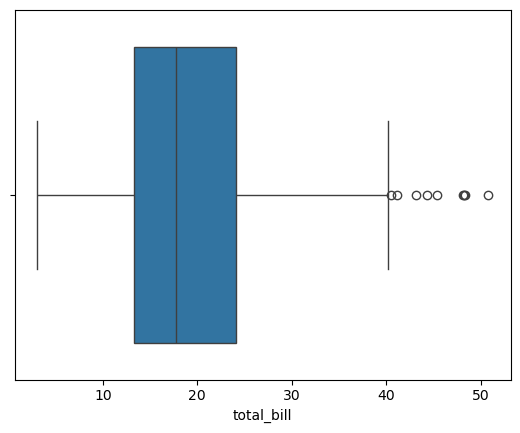

In [44]:
sns.boxplot(data=tips_df, x='total_bill')
plt.show()

**FIGURE LEVEL FUNCTION**

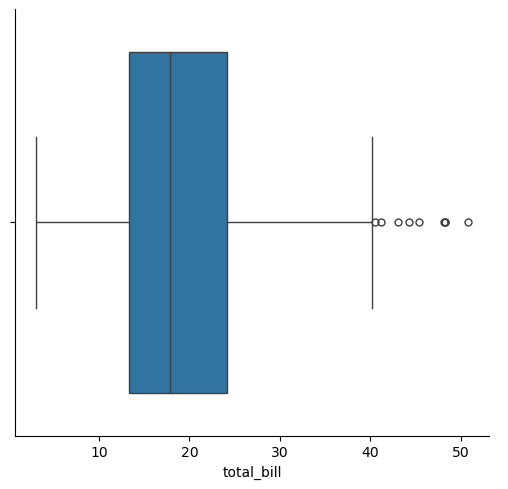

In [40]:
sns.catplot(data=tips_df, x='total_bill', kind='box')
plt.show()

Now, lets see the power of Seaborn's Box Plot Method. Now, we are going to demonstrate a Box Plot to study the distribution of a single variable `total_bill`, category-wise.

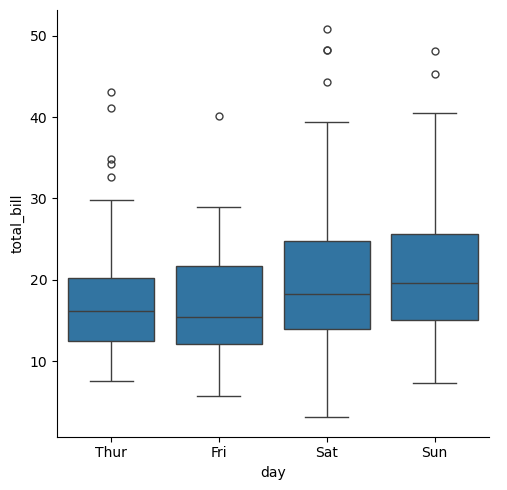

In [43]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='box')
plt.show()

Likewise other plots of Seaborn Library, the `hue` parameter can be used here too, to add another level of information.

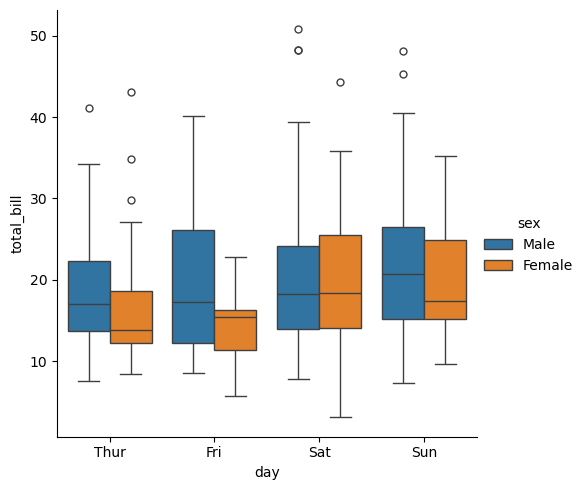

In [45]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='box',
            hue='sex')
plt.show()

### 🎯 **Violin Plot**

**DEFINITION**  
A Violin Plot is a statistical distribution plot that combines a box plot with a kernel density estimate (KDE) to show both summary statistics and the full shape of the data distribution.  

**Actual Idea Behind Violin Plots**  
The core idea of a violin plot is:

$$ \text{Show how data is distributed and how it is summarized — at the same time.} $$

Violin plots were created to overcome the main limitation of box plots:
- Box plots hide distribution shape
- Violin plots reveal density, skewness, and modality  

**What Actually Happens in a Violin Plot**  
1. Data is grouped by a categorical variable
2. A KDE is computed for each group
3. The density curve is mirrored on both sides
4. The mirrored KDE forms a violin-like shape
5. Summary statistics (median, quartiles) may be overlaid

$$ \text{The width of the violin represents data density.} $$

Here's a demonstration of *Violin Plot*, on the `total_bill` column of `tips_df`, categorized by `day`.

**AXES LEVEL FUNCTION**

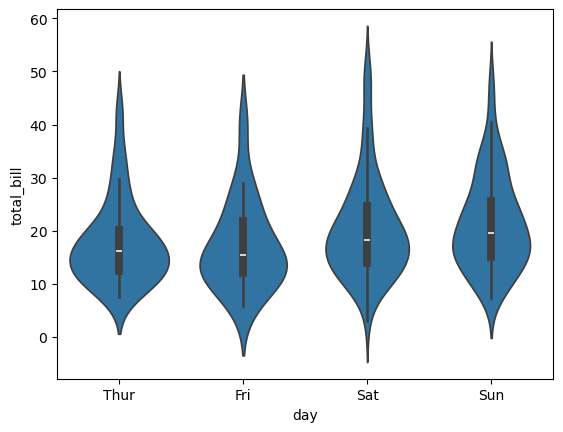

In [46]:
sns.violinplot(data=tips_df, x='day', y='total_bill')
plt.show()

**FIGURE LEVEL FUNCTION**

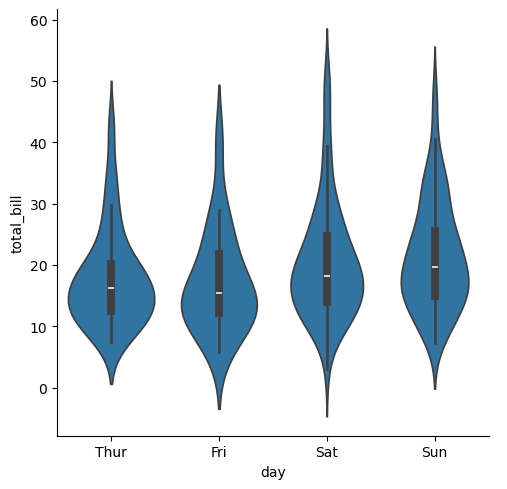

In [47]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='violin')
plt.show()

Likewise other plots of Seaborn Library, the `hue` parameter can be used here too, to add another level of information.

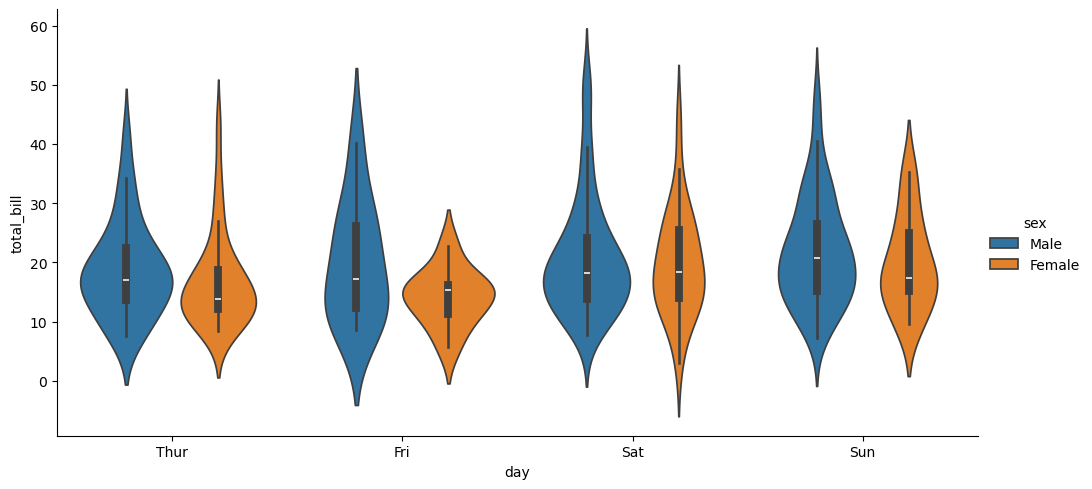

In [51]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='violin',
            hue='sex', aspect=2)
plt.show()

The game changer here is the `split` parameter that does not allow to create separate violind for categories provided through `hue`.

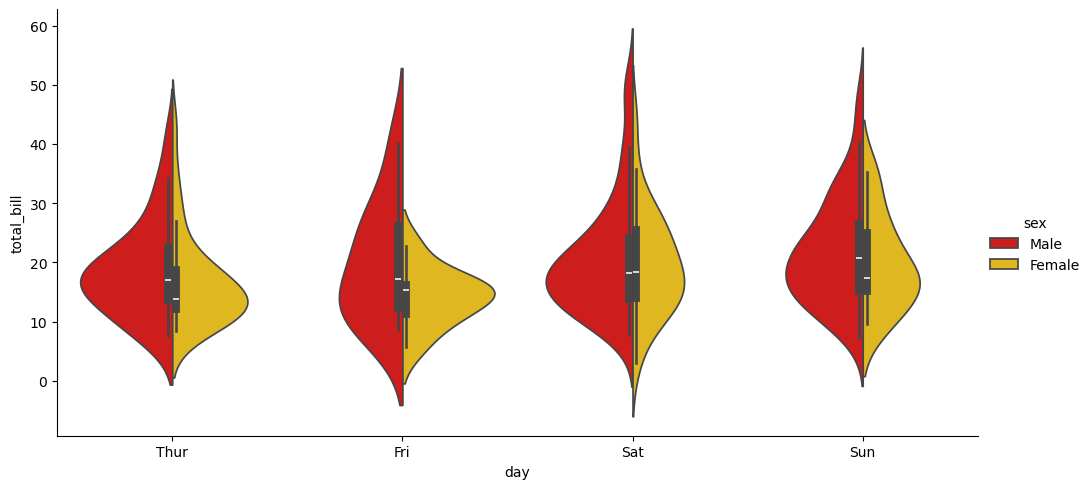

In [58]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='violin',
            hue='sex', split=True, aspect=2, palette='hot')
plt.show()

More modifications to the *Violin Plot* can be done using the `inner` parameter. It decides what to show inside the violin, a box plot, quartiles, or exact observations as points.

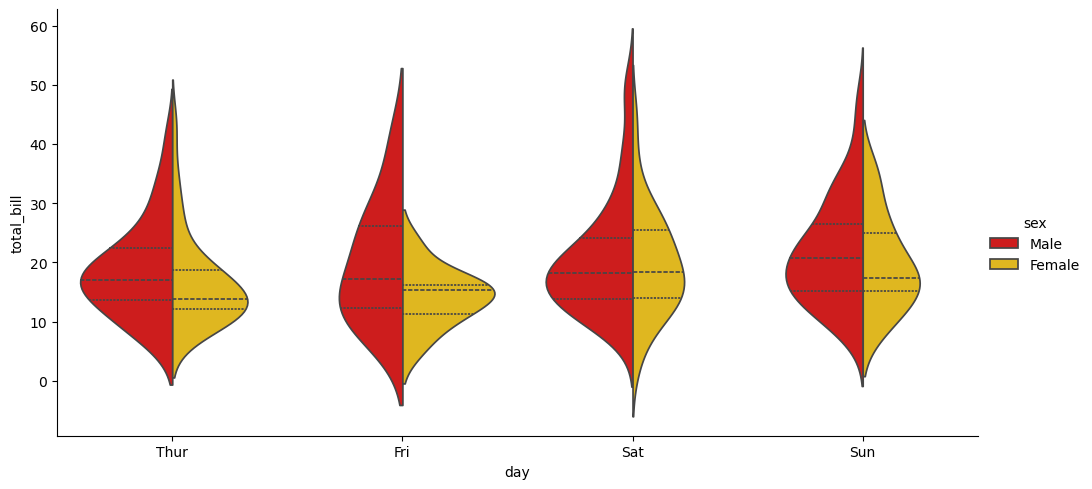

In [69]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='violin',
            hue='sex', split=True, inner='quartile',
            aspect=2, palette='hot')
plt.show()

### 🎯 **Bar Plot**

**DEFINITION**  
A Bar Plot is a categorical statistical plot that displays a summary value (usually an aggregate like mean, sum, or count) for each category using rectangular bars whose height represents the computed statistic.  

**Actual Idea Behind Bar Plots**  

The core idea of a bar plot is:

$$ \text{Compare categories using aggregated values rather than raw data.} $$

Bar plots are not distribution plots.
They are designed to:
- Summarize data
- Highlight differences between categories
- Support quick comparison

**What Actually Happens in a Bar Plot**  
1. Data is grouped by a categorical variable
2. A statistical estimator is applied:
   - Mean (default in Seaborn)
   - Sum, count, median, etc.
3. One value per category is computed
4. Bars are drawn with heights equal to the estimator
5. Optional error bars show uncertainty

In short:
$$ Bar plot = aggregation + comparison $$

**AXES LEVEL FUNCTION**

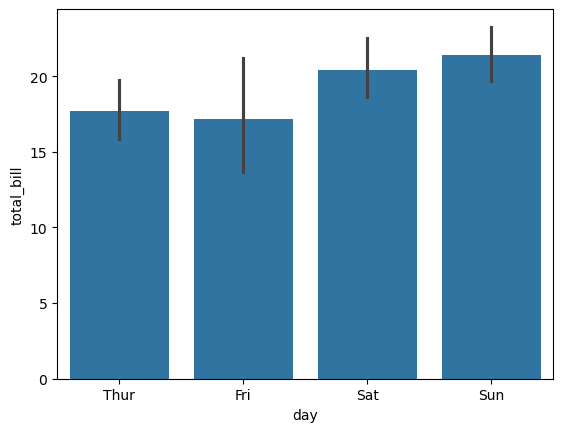

In [71]:
sns.barplot(data=tips_df, x='day', y='total_bill')
plt.show()

**FIGURE LEVEL FUNCTION**

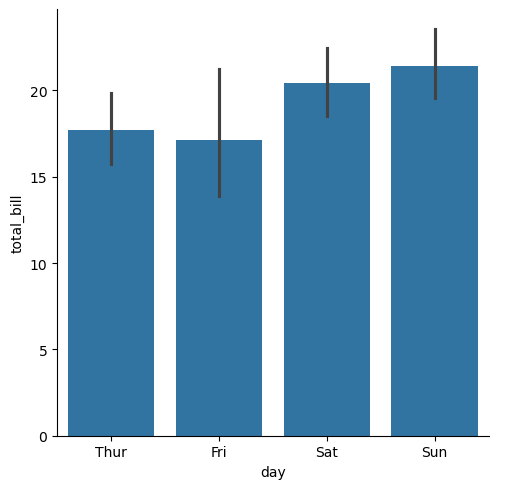

In [72]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='bar')
plt.show()

By default the estimator used here in this function is `mean`. But we can change it to any desired estimator like `std`, `median`, etc.

**STANDARD DEVIATION**

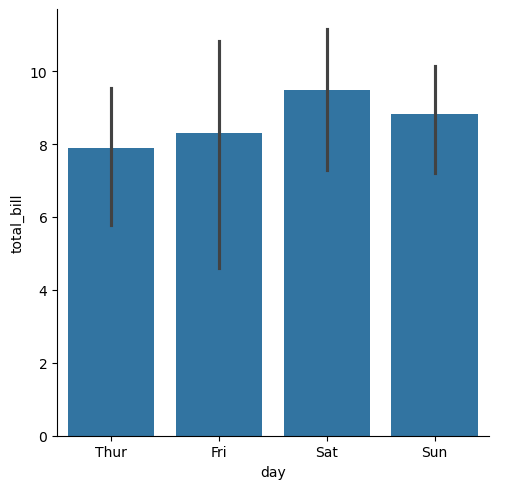

In [80]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='bar',
            estimator='std')
plt.show()

**MINIMUM**

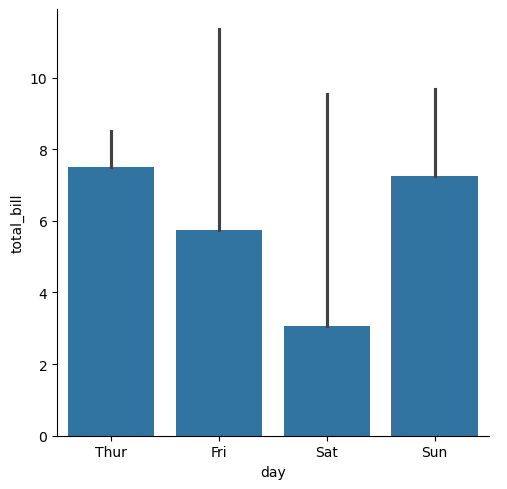

In [82]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='bar',
            estimator='min')
plt.show()

**COUNT**

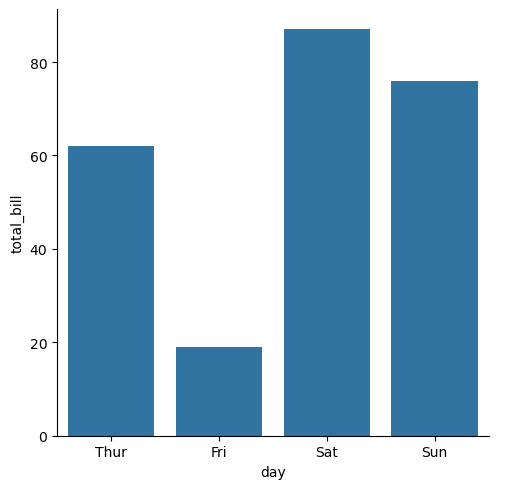

In [83]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='bar',
            estimator='size')
plt.show()

Sometimes those error bars disturb us a lot. So, we have an option to remove it from the plot. All we have to do is to set the value of `errorbar` parameter to `None`.

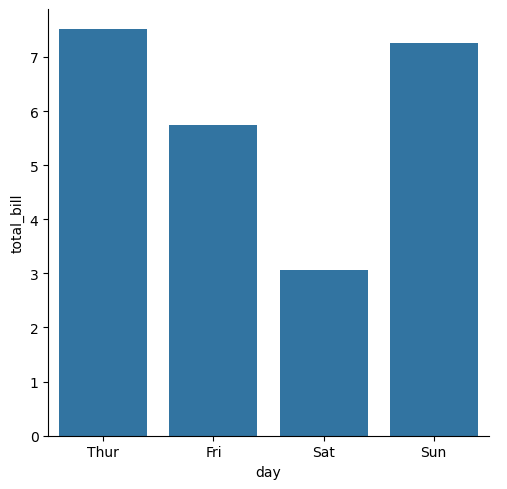

In [85]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='bar',
            estimator='min', errorbar=None)
plt.show()

### 🎯 **Point Plot**

**DEFINITION**  
A Point Plot is a categorical statistical plot that represents summary statistics (such as mean, median, or another estimator) for each category using points, often connected by lines, along with confidence intervals to show uncertainty.  

**Actual Idea Behind Point Plots**  
The core idea of a point plot is:

$$ \text{Compare category-wise statistics clearly while emphasizing trends and uncertainty rather than magnitude.} $$

Unlike bar plots (which emphasize area/height), point plots:
- Emphasize position (which humans compare more accurately)
- Highlight relative differences and trends
- Make confidence intervals visually prominent

**What Actually Happens in a Point Plot**  
1. Data is grouped by one or more categorical variables
2. A statistical estimator is computed for each group (mean by default)
3. Each estimate is plotted as a point
4. Error bars (confidence intervals) are added
5. Optional lines connect points to show trends

In short:
$$ \text{Point plot = estimator + uncertainty + trend} $$

Lets demonstrate the *average* `total_bill` for each day.

**AXES LEVEL FUNCTION**

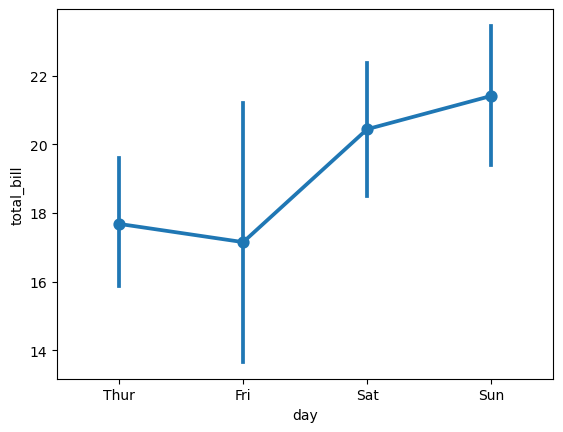

In [88]:
sns.pointplot(data=tips_df, x='day', y='total_bill')
plt.show()

**FIGURE LEVEL FUNCTION**

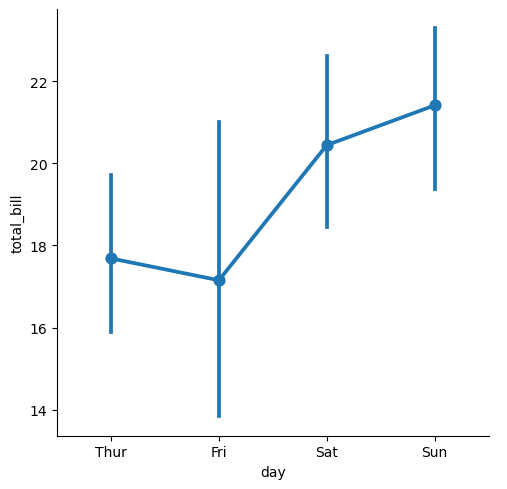

In [91]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='point')
plt.show()

Likewise other plots of Seaborn Library, the `hue` parameter can be used here too, to add another level of information.

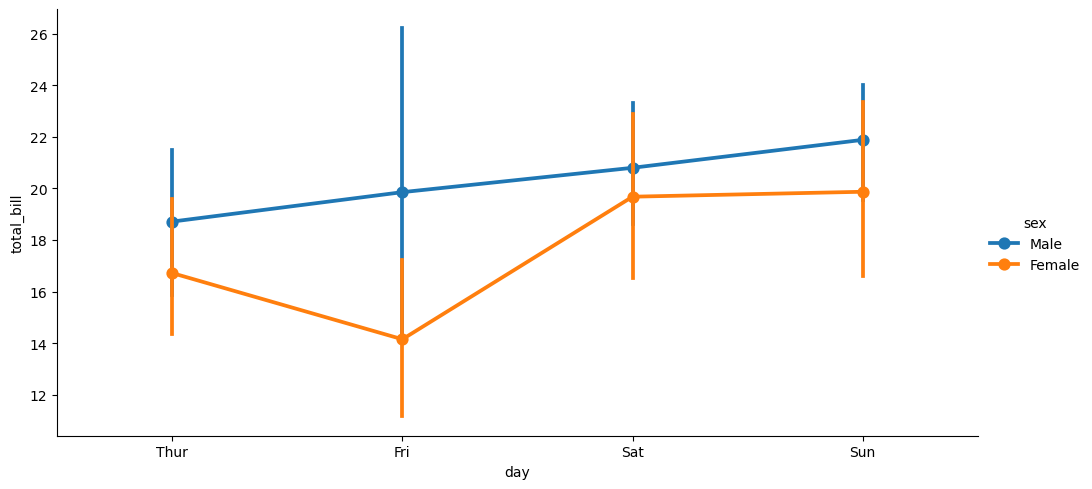

In [96]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='point',
            hue='sex', aspect=2)
plt.show()

To remove the *errorbar*, set the `errorbar` parameter to `None`.

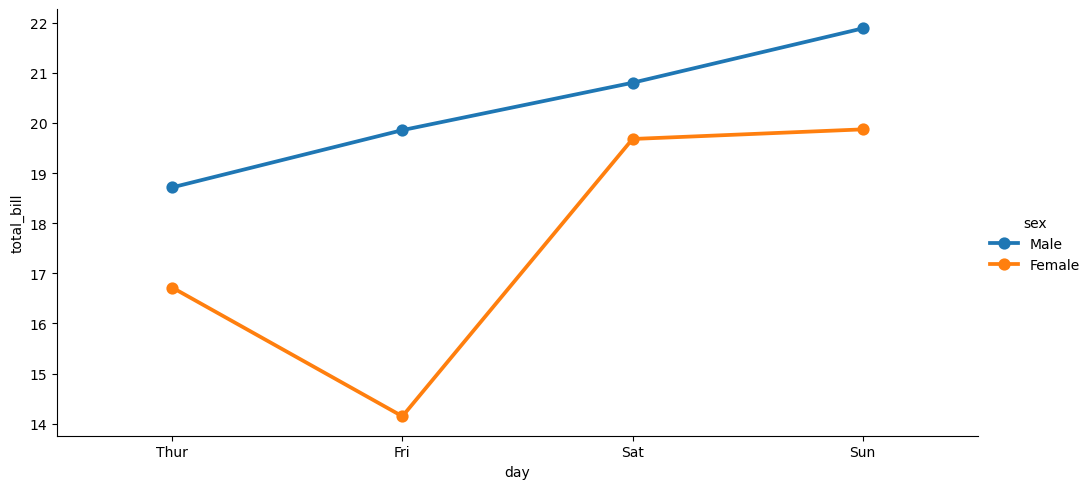

In [98]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='point',
            hue='sex', errorbar=None, aspect=2)
plt.show()

### 🎯 **Count Plot**

**DEFINITION**  
A special case of Bar Plots, where the `estimator` is set to calculate the `count` of the observations in each category.

**NOTE :** Here you have to pass the categorical variable to `x` parameter.

**AXES LEVEL FUNCTION**

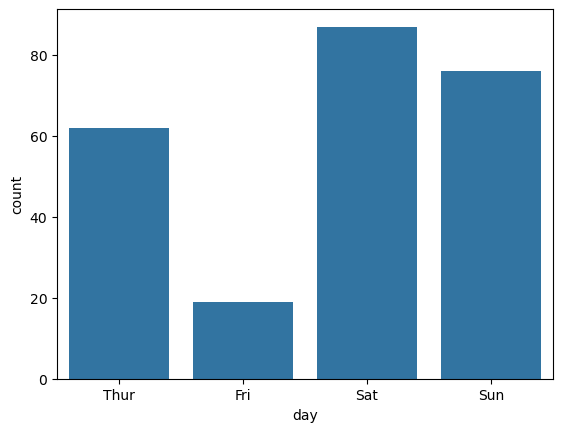

In [104]:
sns.countplot(data=tips_df, x='day')
plt.show()

**FIGURE LEVEL FUNCTION**

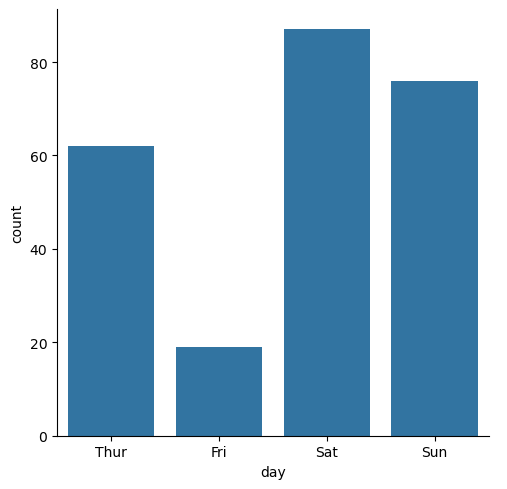

In [105]:
sns.catplot(data=tips_df, x='day', kind='count')
plt.show()

Likewise other plots of Seaborn Library, the `hue` parameter can be used here too, to add another level of information.

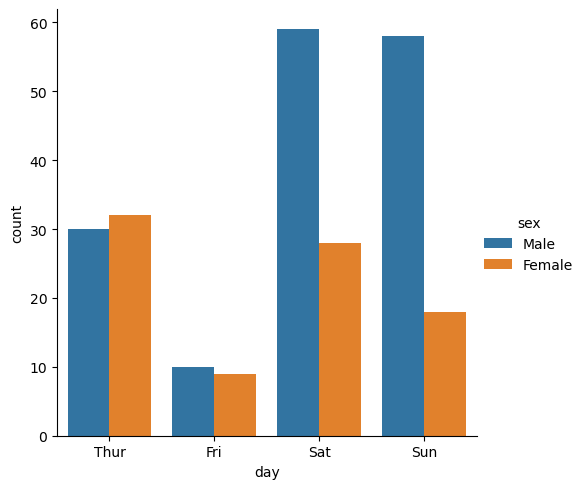

In [106]:
sns.catplot(data=tips_df, x='day', kind='count',
            hue='sex')
plt.show()

## **Regression Plots**

### 🎯 **Reg Plot**

**DEFINITION**  
A Regression Plot (regplot) is a visualization that displays the relationship between two numerical variables by combining a scatter plot with a fitted regression line, often along with a confidence interval for the fit.  

**Actual Idea Behind regPlots**  

The core idea of a regplot is:

$$ \text{Visually model and communicate the relationship between two numerical variables.} $$

regplots go beyond showing raw points by:
- Estimating a trend (relationship)
- Indicating direction and strength
- Displaying uncertainty around the estimate

They are especially useful in exploratory data analysis (EDA) to check linear or non-linear relationships.  

**What Actually Happens in a regPlot**  
1. Each observation is plotted as a scatter point
2. A regression model is fitted:
   - Linear regression by default
3. The predicted values are computed
4. A regression line is drawn
5. A confidence interval (usually 95%) is optionally shown

In short:
$$ \text{regplot = data points + fitted model + uncertainty} $$

To demonstrate `regplot`. lets use the `tips_df` and its columns `total_bill` and `tip` to find out if there is any kind of linear relationship between them.

**AXES LEVEL FUNCTION**  

**Note :** The Axes Level Function doesn't support the `hue` parameter.

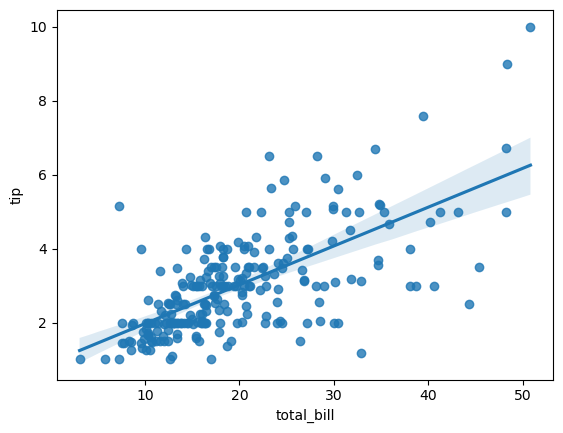

In [113]:
sns.regplot(data=tips_df, x='total_bill', y='tip')
plt.show()

**FIGURE LEVEL FUNCTION**  

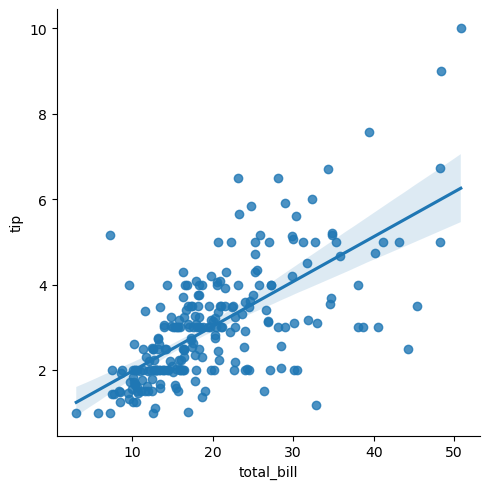

In [ ]:
sns.lmplot(data=tips_df, x='total_bill', y='tip')
plt.show()

**Note :** The Figure Level Function does support the `hue` parameter.

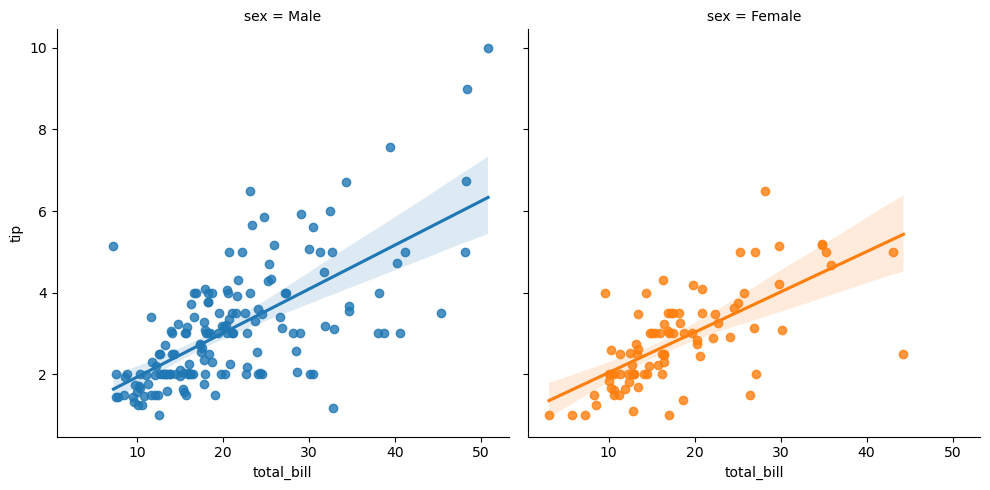

In [116]:
sns.lmplot(data=tips_df, x='total_bill', y='tip', hue='sex', col='sex')
plt.show()

### 🎯 **Residual Plot**

**DEFINITION**  
A Residual Plot is a diagnostic plot that visualizes the residuals (errors) of a regression model, where a residual is the difference between observed and predicted values.  
$$
\text{Residual} = y_{observerd} - y_{predicted}
$$  

**Actual Idea Behind Residual Plots**  

The core idea of a residual plot is:
$$
\text{Check whether the assumptions of a regression model are valid.}
$$
Residual plots are not about prediction accuracy directly.  
They are about model validity.  

**What Actually Happens in a Residual Plot**  
1. A regression model is fitted
2. Predictions are generated
3. Residuals are computed
4. Residuals are plotted against:
   1. Predictor variable (x)
   2. or predicted values
5. A reference line at 0 is added

In short:
$$
\text{Residual plot = errors vs x (or fitted values)}
$$

Lets demonstrate a residual plot for the *same regression plot* demonstrated above.

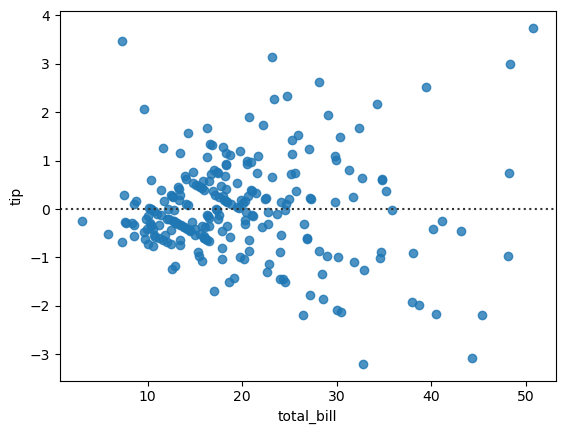

In [117]:
sns.residplot(data=tips_df, x='total_bill', y='tip')
plt.show()

**Interpretation :** The points lying on the black dotted line are the points for which our linear regression model prediction is correct, else are the points which are predicted misleading.

## **Multi-Plot Grids**

### 🎯 **FacetGrid**

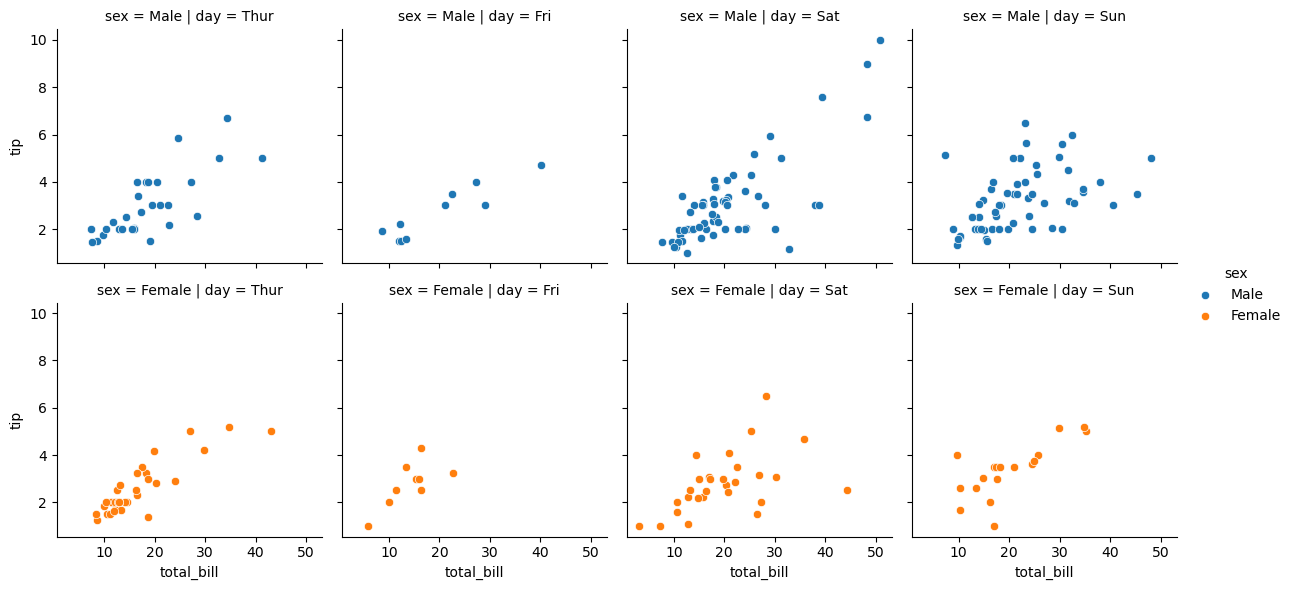

In [ ]:
g = sns.FacetGrid(data=tips_df, row='sex', col='day', hue='sex')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

### 🎯 **Pair Plot**

**DEFINITION**  
A Pair Plot is a multivariate exploratory visualization that displays pairwise relationships between multiple numerical variables in a dataset, along with their individual distributions, arranged in a matrix (grid) form.  

**Actual Idea Behind PairPlots**  

The core idea of a pair plot is:
$$
\text{Explore all pairwise relationships and distributions at once to quickly detect patterns, correlations, and anomalies.}
$$

Instead of plotting variables one by one, pair plots:
- Automate scatter plots for every variable pair
- Show univariate distributions on the diagonal
- Provide a holistic view of the dataset structure

**What Actually Happens in a PairPlot**  
1. Select multiple numerical variables
2. Create a grid where:
   - Rows = variables
   - Columns = variables
3. Off-diagonal cells:
   - Show pairwise relationships (usually scatter plots)
4. Diagonal cells:
   - Show distributions (histogram or KDE)
5. Optional color coding (hue) separates groups

In short:
$$
\text{PairPlot = distributions + all pairwise relationships}
$$

Here is a demonstration of Pair Plots on the `iris_df`.

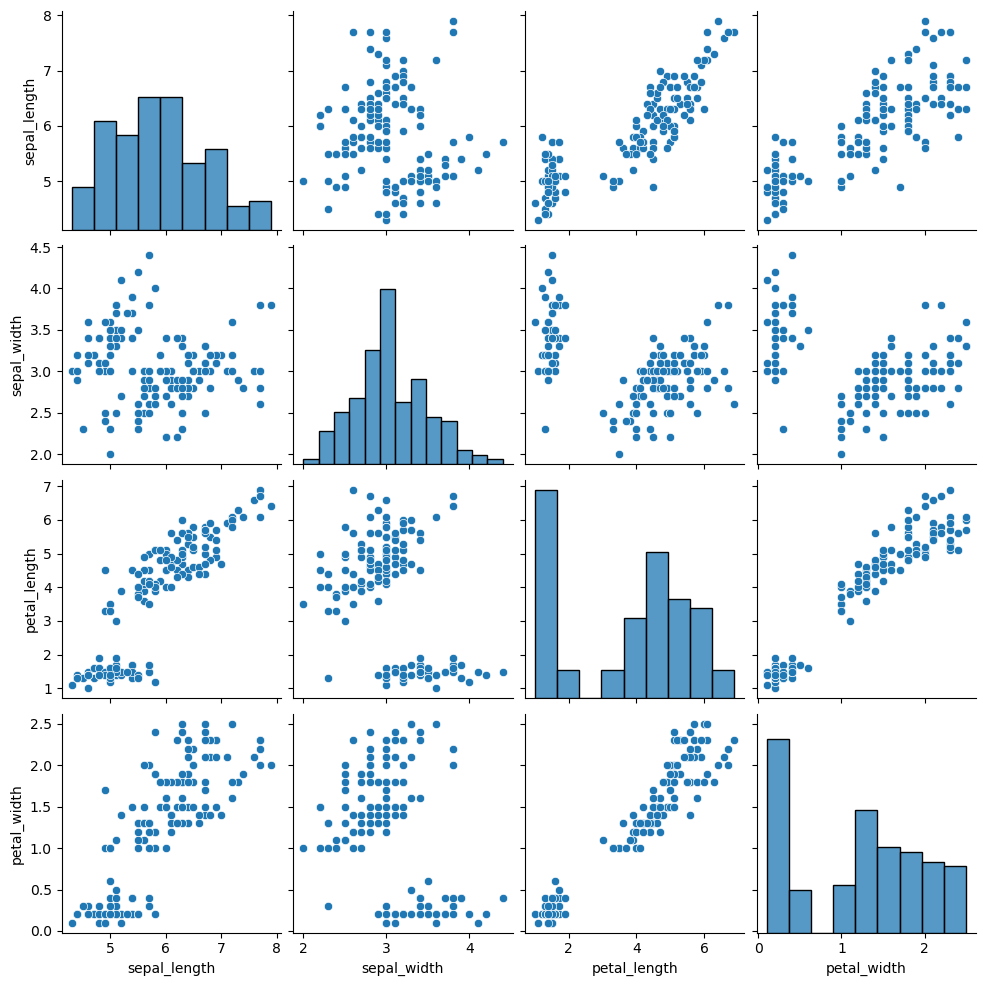

In [127]:
sns.pairplot(data=iris_df)
plt.show()

**WHAT HAPPENED?**  
The `pairplot` automatically detects the numerical columns from the data provided and plots all possible pairs formed using the numerical columns detected.

If you analyse this Pair Plot, you will observe following things:  
1. *Diagonal Plots* plots the distribution of the all numerical columns.
2. *Non-diagonal Plots*, plots the `scatterplot`, which is default in the `pairplot` method.  

Now, the question is : Can we change these plots that are displaying on the Pair Plot?  
And, the answer is : YES, we can. Here is how to do it.  

1. For *Diagonal Plots*, use the `diag_kind` parameter.
2. For *Non-Diagonal Plots*, use the `kind` parameter.

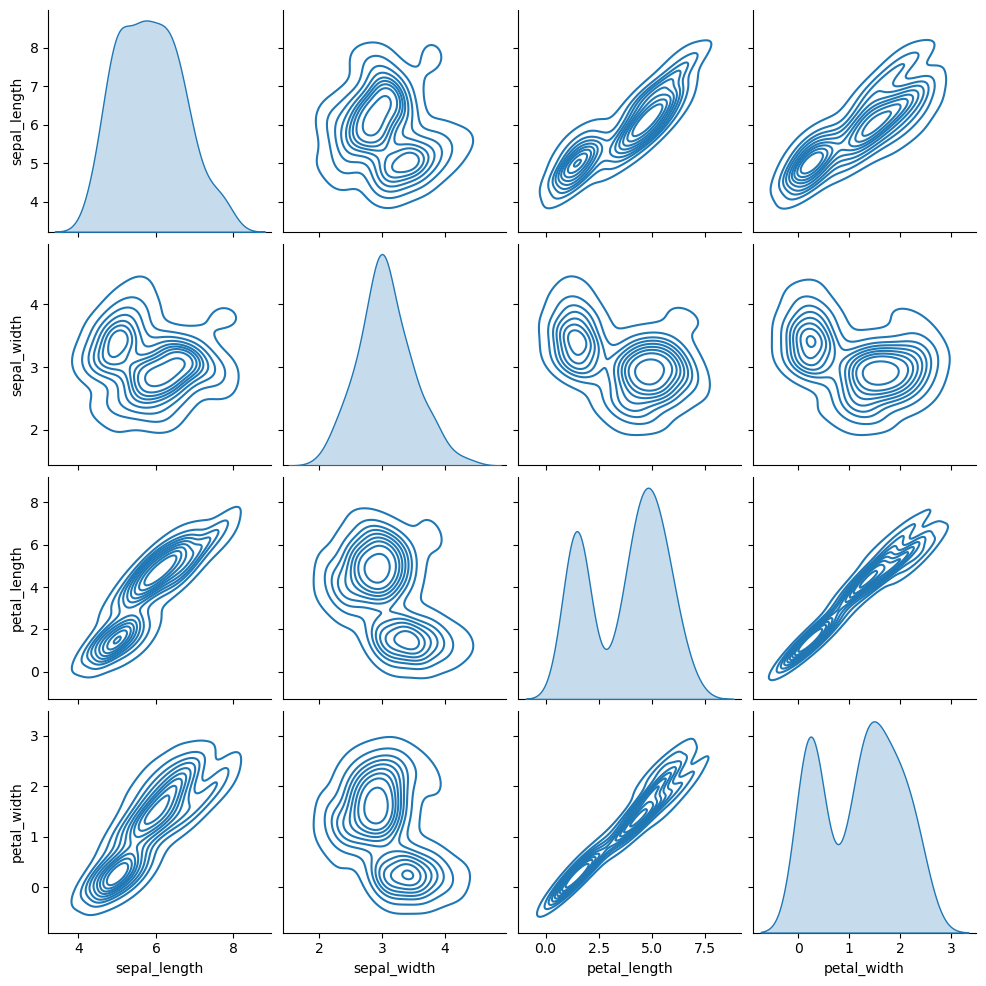

In [129]:
sns.pairplot(data=iris_df, kind='kde', diag_kind='kde')
plt.show()

Passing the `hue` parameter will improve the game.

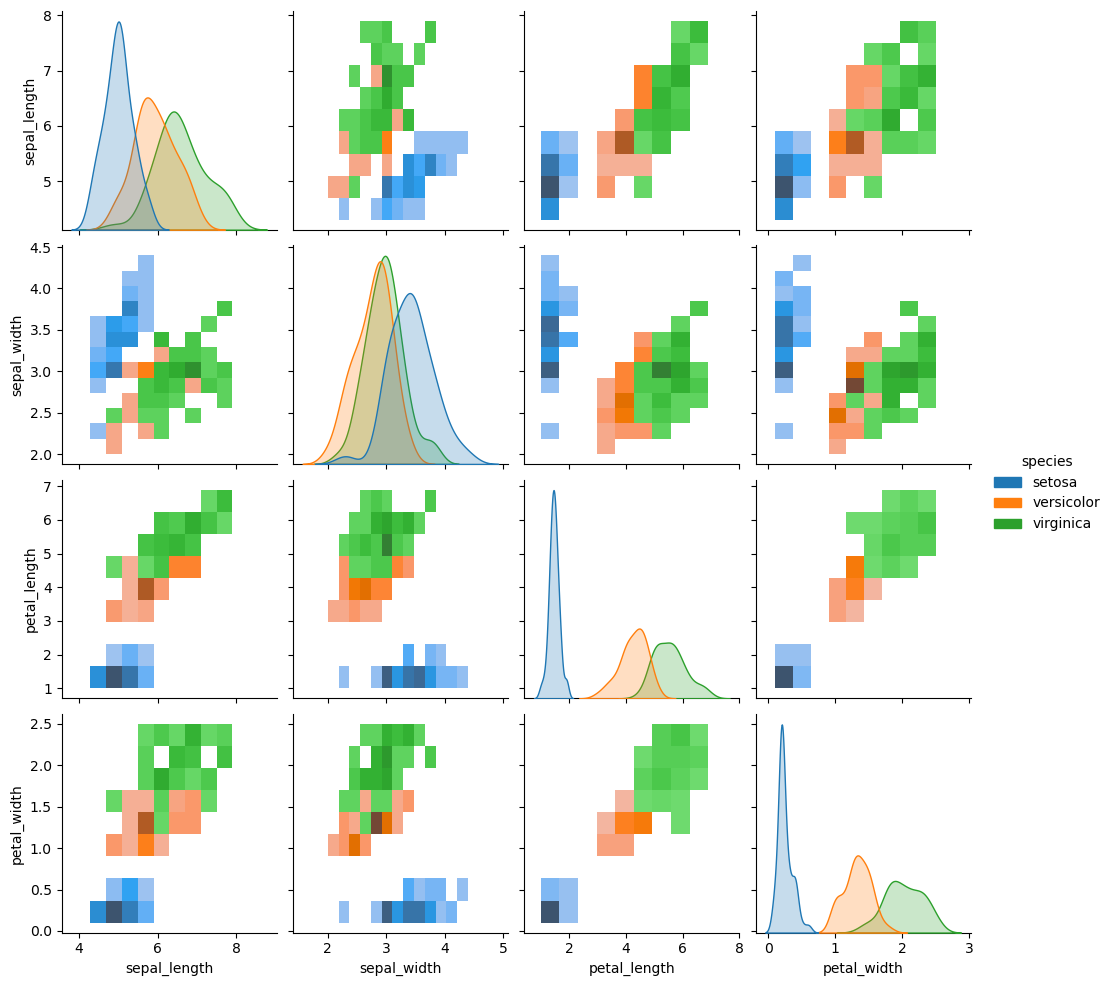

In [133]:
sns.pairplot(data=iris_df, kind='hist', diag_kind='kde', hue='species')
plt.show()

### 🎯 **Pair Plot using PairGrid**

Another way to plot Pair Plot in Seaborn, is by using a PairGrid Object.

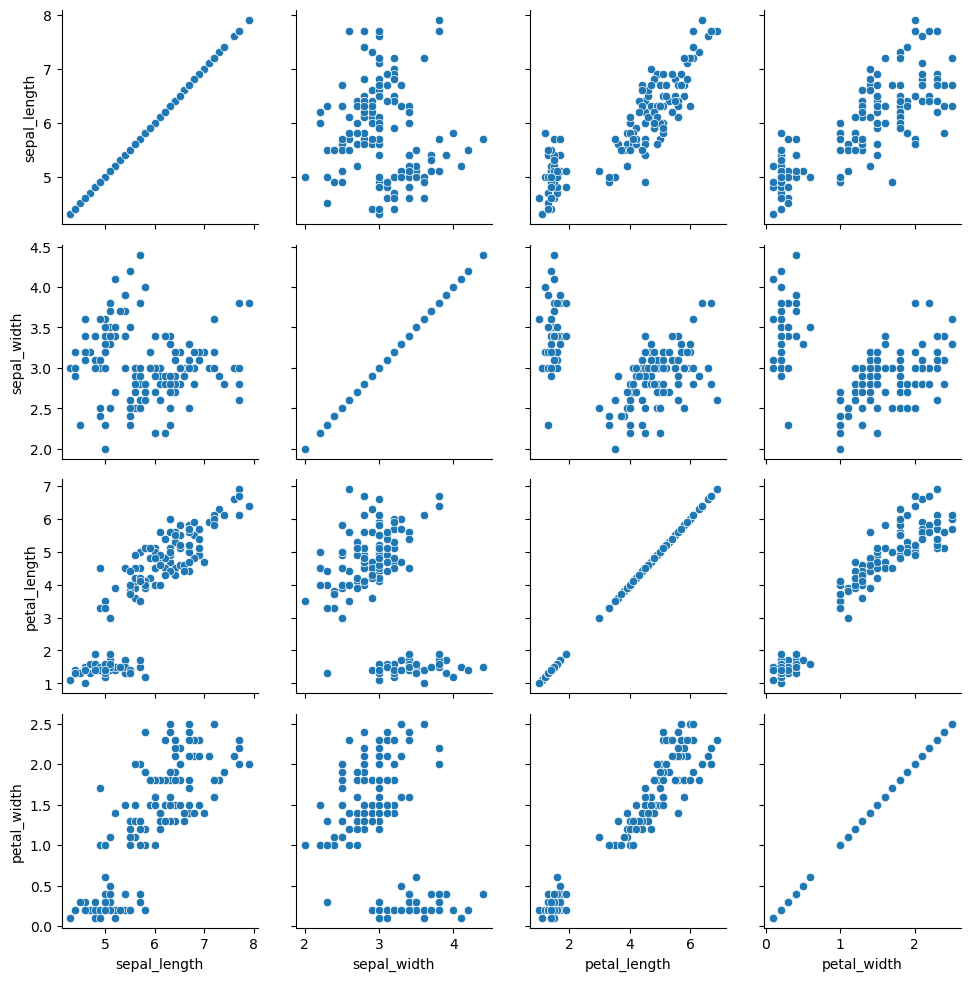

In [ ]:
g = sns.PairGrid(data=iris_df)
g.map(sns.scatterplot)
plt.show()

Now, using a PairGrid to visualize Pair Plot, gives us flexibilty to manipulate the plots by providing the following methods :  
1. `PairGrid.map()` : It maps the provided plot function for all the pairs.
2. `PairGrid.map_diag()` : It maps the provided plot function for only diagonal pairs.
3. `PairGrid.map_offdiag()` : It maps the provided plot function for only non-diagonal pairs.
4. `PairGrid.map_lower()` : It maps the provided plot function for only the pairs below the diagonal.
5. `PairGrid.map_upper()` : It maps the provided plot function for only the pairs above the diagonal.

Here are some demonstration of all these methods.

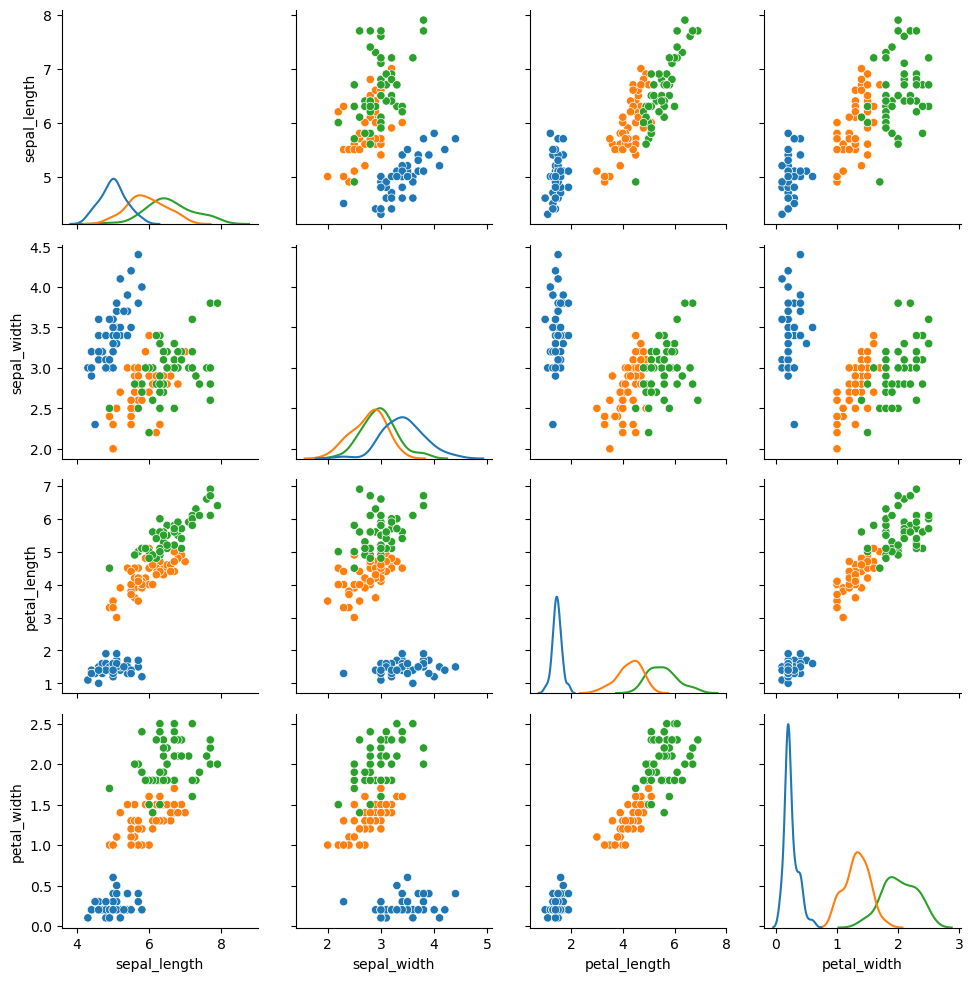

In [138]:
g = sns.PairGrid(data=iris_df, hue='species')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.kdeplot)
plt.show()

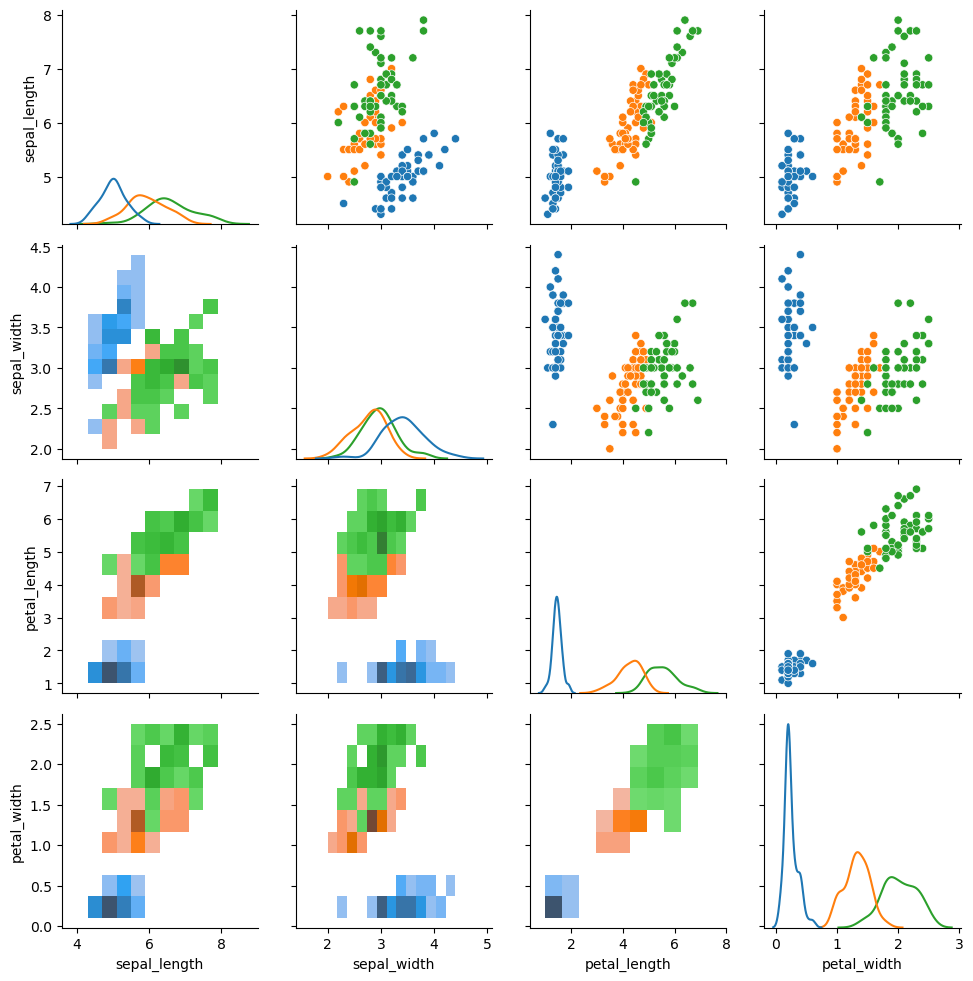

In [139]:
g = sns.PairGrid(data=iris_df, hue='species')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.histplot)
plt.show()

By default, the `PairGrid` uses all the numerical columns of the dataset provided. But what if we want to use particular columns to visualize pair plots. So, for this we have the `vars` parameter. You would have to pass an iterable of column names to the `vars` parameter.

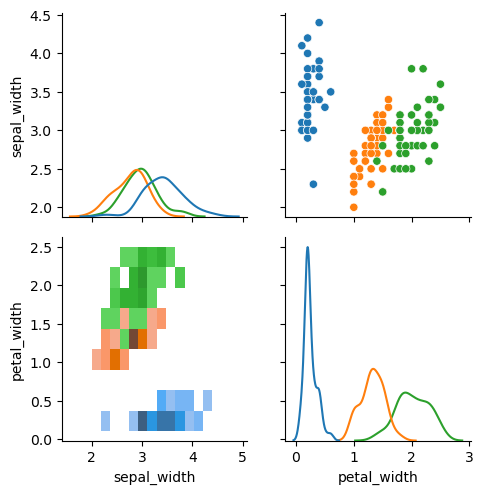

In [140]:
g = sns.PairGrid(data=iris_df, hue='species',
                 vars=['sepal_width', 'petal_width'])
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.histplot)
plt.show()

### 🎯 **Joint Plot**

**DEFINITION**  
A Joint Plot is a bivariate exploratory visualization that displays the relationship between two numerical variables along with their individual (marginal) distributions in a single, combined figure.  

**Actual Idea Behind Joint Plots**  

The core idea of a joint plot is:
$$
\text{Understand how two variables relate to each other and how each variable behaves individually.}
$$
Instead of separating these views, a joint plot:
- Combines bivariate relationship
- With univariate distributions
- In one coherent layout

This gives context to the relationship you see.  

**What Actually Happens in a Joint Plot**  
1. Two numerical variables (x and y) are selected
2. The central plot shows their relationship:
   - Scatter
   - KDE
   - Hexbin
   - Regression
3. The top plot shows the distribution of x
4. The right plot shows the distribution of y
5. All plots share the same axes alignment

In short:
$$
\text{Joint plot = relationship + marginal distributions}
$$

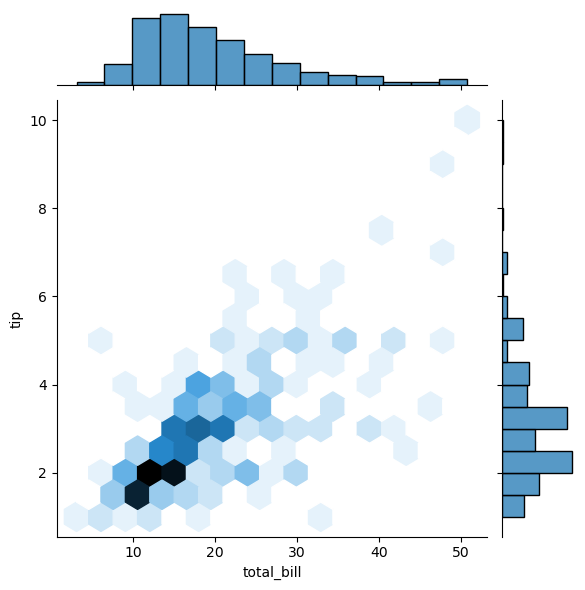

In [ ]:
sns.jointplot(data=tips_df, x='total_bill', y='tip')
plt.show()

You can easily change the type of plot used to visualize with the help of `kind` parameter. Keep in mind that `sns.jointplot` isn't much flexible, as it provides you with limited types of plots to choose from. Also the distribution plots are not in your control.

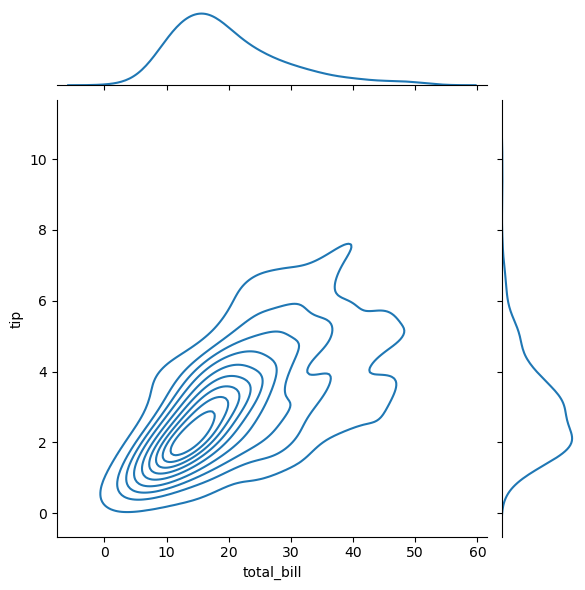

In [147]:
sns.jointplot(data=tips_df, x='total_bill', y='tip', kind='kde')
plt.show()

### 🎯 **Joint Plot using JointGrid**

Another way to visualize a Joint Plot, is by using a `JointGrid` Object, which provides much felxibilty.

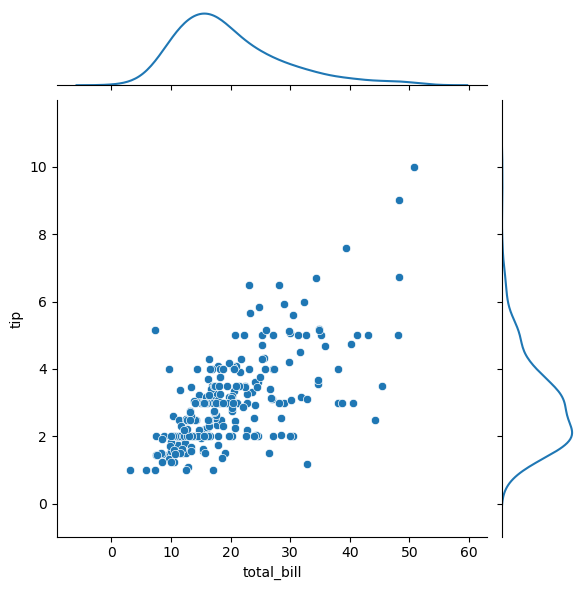

In [151]:
g = sns.JointGrid(data=tips_df, x='total_bill', y='tip')
g.plot(joint_func=sns.scatterplot,
       marginal_func=sns.kdeplot)
plt.show()

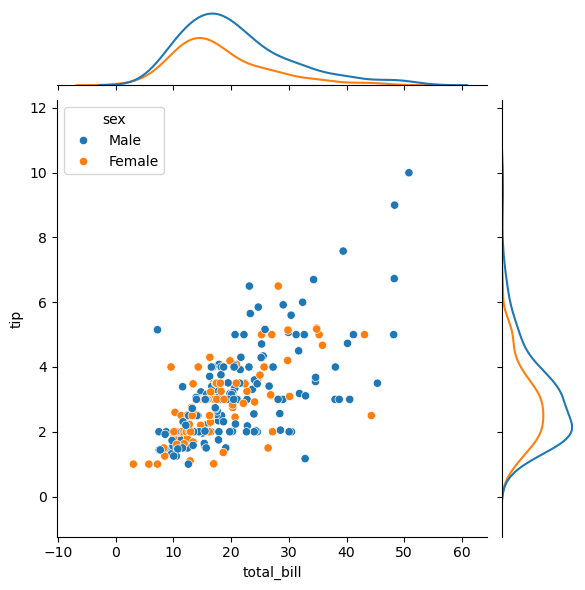

In [150]:
g = sns.JointGrid(data=tips_df, x='total_bill', y='tip', hue='sex')
g.plot(joint_func=sns.scatterplot,
       marginal_func=sns.kdeplot)
plt.show()